# Data Exploration

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv('./dataset/pima-indians-diabetes.data.csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [53]:
df.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


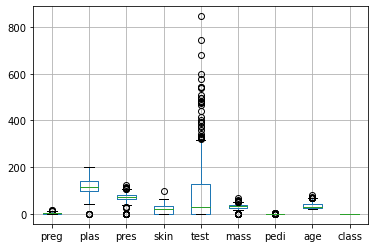

In [54]:
df.boxplot()

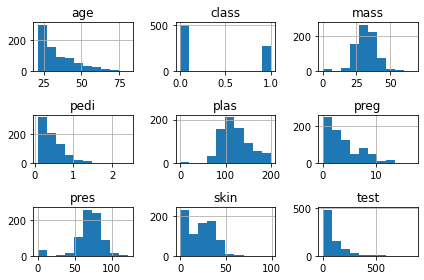

In [55]:
df.hist()
plt.tight_layout()

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: plas, dtype: object

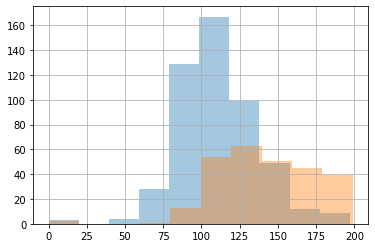

In [57]:
df.groupby('class').plas.hist(alpha=0.4)

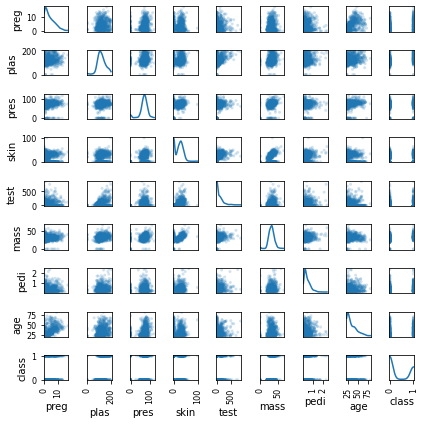

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.tight_layout()

C:\Users\isaac\Anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


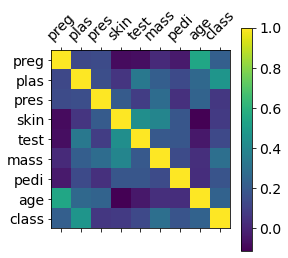

In [60]:
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()


# Feature Cleaning

In [2]:
import pandas as pd
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

df = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
print(df.shape)

(891, 6)


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [4]:
# Listwise deletion
df_no_missing = df.dropna()
df_no_missing.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [6]:
# Arbitrary Value Imputation
print('fill missing value with arbitrary value')
df_av_imputation = df.copy() 
df_av_imputation["Age"].fillna(0, inplace=True)
df_av_imputation.head(10)

fill missing value with arbitrary value


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,0.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [7]:
# Arbitrary Value Imputation
print('fill missing value with Mean/Median/Mode value')
df_mean_imputation = df.copy() 
df_median_imputation = df.copy() 
df_mode_imputation = df.copy() 

fill missing value with Mean/Median/Mode value


In [8]:
df_mean_imputation["Age"].fillna(df["Age"].mean(), inplace=True)
df_mean_imputation.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.000000,1,7.2500
1,1,1,female,38.000000,1,71.2833
2,1,3,female,26.000000,0,7.9250
3,1,1,female,35.000000,1,53.1000
4,0,3,male,35.000000,0,8.0500
5,0,3,male,29.699118,0,8.4583
6,0,1,male,54.000000,0,51.8625
7,0,3,male,2.000000,3,21.0750
8,1,3,female,27.000000,0,11.1333
9,1,2,female,14.000000,1,30.0708


In [12]:
df_median_imputation["Age"].fillna(df["Age"].median(), inplace=True)
df_median_imputation.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
5,0,3,male,28.0,0,8.4583
6,0,1,male,54.0,0,51.8625
7,0,3,male,2.0,3,21.0750
8,1,3,female,27.0,0,11.1333
9,1,2,female,14.0,1,30.0708


In [13]:
#df_mode_imputation["Age"].fillna(df["Age"].mode(), inplace=True)
#df_mode_imputation.head(10)

In [15]:
# End of distribution Imputation
# mean + 3*std
print('fill missing value with end of distribution imputation')
df_eof_imputation = df.copy() 
df_eof_imputation["Age"].fillna(df["Age"].mean()+3*df["Age"].std(), inplace=True)
df_eof_imputation.head(10)

fill missing value with end of distribution imputation


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.00000,1,7.2500
1,1,1,female,38.00000,1,71.2833
2,1,3,female,26.00000,0,7.9250
3,1,1,female,35.00000,1,53.1000
4,0,3,male,35.00000,0,8.0500
5,0,3,male,73.27861,0,8.4583
6,0,1,male,54.00000,0,51.8625
7,0,3,male,2.00000,3,21.0750
8,1,3,female,27.00000,0,11.1333
9,1,2,female,14.00000,1,30.0708


In [24]:
# detect outlier 
import numpy as np
import pandas as pd
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]


data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
data.head(3)
print(data.shape)

(891, 6)


In [19]:
# detect outlier:  Detect by arbitrary boundary
def outlier_detect_arbitrary(data,col,upper_fence,lower_fence):
    '''
    identify outliers based on arbitrary boundaries passed to the function.
    '''

    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col]>upper_fence,data[col]<lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))    
    return outlier_index, para

index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 19 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5


179      0.0000
806      0.0000
732      0.0000
674      0.0000
633      0.0000
597      0.0000
815      0.0000
466      0.0000
481      0.0000
302      0.0000
277      0.0000
271      0.0000
263      0.0000
413      0.0000
822      0.0000
378      4.0125
679    512.3292
737    512.3292
258    512.3292
Name: Fare, dtype: float64

In [20]:
# detect outlier: IQR method
def outlier_detect_IQR(data,col,threshold=3):
    '''
    outlier detection by Interquartile Ranges Rule, also known as Tukey's test. 
    calculate the IQR ( 75th quantile - 25th quantile) 
    and the 25th 75th quantile. 
    Any value beyond:
        upper bound = 75th quantile + （IQR * threshold）
        lower bound = 25th quantile - （IQR * threshold）   
    are regarded as outliers. Default threshold is 3.
    '''
     
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

index,para = outlier_detect_IQR(data=data,col='Fare',threshold=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 31 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 31
Proportion of outlier detected 0.03479236812570146
Upper bound: 146.448 
Lower bound: -107.53760000000001


31     146.5208
195    146.5208
305    151.5500
708    151.5500
297    151.5500
498    151.5500
609    153.4625
332    153.4625
268    153.4625
318    164.8667
856    164.8667
730    211.3375
779    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
716    227.5250
557    227.5250
380    227.5250
299    247.5208
118    247.5208
311    262.3750
742    262.3750
341    263.0000
88     263.0000
438    263.0000
27     263.0000
679    512.3292
258    512.3292
737    512.3292
Name: Fare, dtype: float64

In [22]:
# detect outlier: Mean and Standard Deviation Method

def outlier_detect_mean_std(data,col,threshold=3):
    '''
    outlier detection by Mean and Standard Deviation Method.
    If a value is a certain number(called threshold) of standard deviations away 
    from the mean, that data point is identified as an outlier. 
    Default threshold is 3.

    This method can fail to detect outliers because the outliers increase the standard deviation. 
    The more extreme the outlier, the more the standard deviation is affected.
    '''
   
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

index,para = outlier_detect_mean_std(data=data,col='Fare',threshold=3)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# check the 20 found outliers
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 20
Proportion of outlier detected 0.02244668911335578
Upper bound: 181.2844937601173 
Lower bound: -116.87607782296804


779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

In [25]:
# detect outlier: MAD method
def outlier_detect_MAD(data,col,threshold=3.5):
    """
    outlier detection by Median and Median Absolute Deviation Method (MAD)
    The median of the residuals is calculated. Then, the difference is calculated between each historical value and this median. 
    These differences are expressed as their absolute values, and a new median is calculated and multiplied by 
    an empirically derived constant to yield the median absolute deviation (MAD). 
    If a value is a certain number of MAD away from the median of the residuals, 
    that value is classified as an outlier. The default threshold is 3 MAD.
    
    This method is generally more effective than the mean and standard deviation method for detecting outliers, 
    but it can be too aggressive in classifying values that are not really extremely different. 
    Also, if more than 50% of the data points have the same value, MAD is computed to be 0, 
    so any value different from the residual median is classified as an outlier.
    """
    
    median = data[col].median()
    median_absolute_deviation = np.median([np.abs(y - median) for y in data[col]])
    modified_z_scores = pd.Series([0.6745 * (y - median) / median_absolute_deviation for y in data[col]])
    outlier_index = np.abs(modified_z_scores) > threshold
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index

# too aggressive for our dataset, about 18% of cases are detected as outliers.
index = outlier_detect_MAD(data=data,col='Fare',threshold=3.5)
data.loc[index,'Fare'].sort_values()

Num of outlier detected: 160
Proportion of outlier detected 0.17957351290684623


867     50.4958
571     51.4792
6       51.8625
457     51.8625
669     52.0000
         ...   
27     263.0000
438    263.0000
737    512.3292
679    512.3292
258    512.3292
Name: Fare, Length: 160, dtype: float64

In [29]:
# handle outlier: impute_outlier_with_arbitrary
def impute_outlier_with_arbitrary(data,outlier_index,value,col=[]):
    """
    impute outliers with arbitrary value
    """
    
    data_copy = data.copy(deep=True)
    for i in col:
        data_copy.loc[outlier_index,i] = value
    return data_copy
index,para = outlier_detect_arbitrary(data=data,col='Fare',upper_fence=300,lower_fence=5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
print('before handling outlier:')
print(data[255:275])
print('after handling outlier:')
data2 = impute_outlier_with_arbitrary(data=data,outlier_index=index, value=-999,col=['Fare'])
print(data2[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
before handling outlier:
     Survived  Pclass     Sex   Age  SibSp      Fare
255         1       3  female  29.0      0   15.2458
256         1       1  female   NaN      0   79.2000
257         1       1  female  30.0      0   86.5000
258         1       1  female  35.0      0  512.3292
259         1       2  female  50.0      0   26.0000
260         0       3    male   NaN      0    7.7500
261         1       3    male   3.0      4   31.3875
262         0       1    male  52.0      1   79.6500
263         0       1    male  40.0      0    0.0000
264         0       3  female   NaN      0    7.7500
265         0       2    male  36.0      0   10.5000
266         0       3    male  16.0      4   39.6875
267         1       3    male  25.0      1    7.7750
268         1       1  female  58.0      0  153.4625
269         1       1  female  35.0      0  135.6333
270         0  

In [30]:
# handle outlier: windsorization 
def windsorization(data,col,para,strategy='both'):
    """
    top-coding & bottom coding (capping the maximum of a distribution at an arbitrarily set value,vice versa)
    """
    
    data_copy = data.copy(deep=True)  
    if strategy == 'both':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
        data_copy.loc[data_copy[col]<para[1],col] = para[1]
    elif strategy == 'top':
        data_copy.loc[data_copy[col]>para[0],col] = para[0]
    elif strategy == 'bottom':
        data_copy.loc[data_copy[col]<para[1],col] = para[1]  
    return data_copy

# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
print('before handling outlier:')
print(data[255:275])
print('after handling outlier:')
# see index 258,263,271 have been replaced with top/bottom coding
data3 = windsorization(data=data,col='Fare',para=para,strategy='both')
print(data3[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
before handling outlier:
     Survived  Pclass     Sex   Age  SibSp      Fare
255         1       3  female  29.0      0   15.2458
256         1       1  female   NaN      0   79.2000
257         1       1  female  30.0      0   86.5000
258         1       1  female  35.0      0  512.3292
259         1       2  female  50.0      0   26.0000
260         0       3    male   NaN      0    7.7500
261         1       3    male   3.0      4   31.3875
262         0       1    male  52.0      1   79.6500
263         0       1    male  40.0      0    0.0000
264         0       3  female   NaN      0    7.7500
265         0       2    male  36.0      0   10.5000
266         0       3    male  16.0      4   39.6875
267         1       3    male  25.0      1    7.7750
268         1       1  female  58.0      0  153.4625
269         1       1  female  35.0      0  135.6333
270         0  

In [31]:
# handle outlier: drop outlier
def drop_outlier(data,outlier_index):
    """
    drop the cases that are outliers
    """
    
    data_copy = data[~outlier_index]
    return data_copy
# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])

# drop the outlier.
# we can see no more observations have value >300 or <5. They've been removed.
data4 = drop_outlier(data=data,outlier_index=index)
print(data4.Fare.max())
print(data4.Fare.min())

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
263.0
5.0


In [32]:
# handle outlier: impute with mean 
def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    """
    impute outlier with mean/median/most frequent values of that variable.
    """
    
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy.loc[outlier_index,col] = data_copy[col].mean()
    elif strategy=='median':
        data_copy.loc[outlier_index,col] = data_copy[col].median()
    elif strategy=='mode':
        data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]   
        
    return data_copy
# use any of the detection method above
index,para = outlier_detect_arbitrary(data,'Fare',300,5)
print('Upper bound:',para[0],'\nLower bound:',para[1])
# see index 258,263,271 have been replaced with mean

data5 = impute_outlier_with_avg(data=data,col='Fare',
                                   outlier_index=index,strategy='mean')
print(data5[255:275])

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5
     Survived  Pclass     Sex   Age  SibSp        Fare
255         1       3  female  29.0      0   15.245800
256         1       1  female   NaN      0   79.200000
257         1       1  female  30.0      0   86.500000
258         1       1  female  35.0      0   32.204208
259         1       2  female  50.0      0   26.000000
260         0       3    male   NaN      0    7.750000
261         1       3    male   3.0      4   31.387500
262         0       1    male  52.0      1   79.650000
263         0       1    male  40.0      0   32.204208
264         0       3  female   NaN      0    7.750000
265         0       2    male  36.0      0   10.500000
266         0       3    male  16.0      4   39.687500
267         1       3    male  25.0      1    7.775000
268         1       1  female  58.0      0  153.462500
269         1       1  female  35.0      0  135.633300
270     

# Feature Engineering



In [35]:
# Feature scaling
from sklearn.model_selection import train_test_split
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

(623, 6) (268, 6)


In [37]:
# feature scaling: Z-score normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))
# check if it is with mean=0 std=1
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std())

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_zscore
857         1       1    male  51.0      0  26.5500    -0.122530
52          1       1  female  49.0      1  76.7292     0.918124
386         0       3    male   1.0      5  46.9000     0.299503
124         0       1    male  54.0      0  77.2875     0.929702
578         0       3  female   NaN      1  14.4583    -0.373297
549         1       2    male   8.0      1  36.7500     0.089005
5.417460665907666e-17
1.000803535686101


In [38]:
# feature scaling: min-max normaliztion 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))
# check the range of Fare_minmax
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_minmax
857         1       1    male  51.0      0  26.5500     0.051822
52          1       1  female  49.0      1  76.7292     0.149765
386         0       3    male   1.0      5  46.9000     0.091543
124         0       1    male  54.0      0  77.2875     0.150855
578         0       3  female   NaN      1  14.4583     0.028221
549         1       2    male   8.0      1  36.7500     0.071731
1.0
0.0


In [39]:
# feature scaling: robust normaliztion 
from sklearn.preprocessing import RobustScaler
rs = RobustScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_robust
857         1       1    male  51.0      0  26.5500     0.492275
52          1       1  female  49.0      1  76.7292     2.630973
386         0       3    male   1.0      5  46.9000     1.359616
124         0       1    male  54.0      0  77.2875     2.654768
578         0       3  female   NaN      1  14.4583    -0.023088
549         1       2    male   8.0      1  36.7500     0.927011


In [6]:
# feature Discretize
import pandas as pd
from sklearn.model_selection import train_test_split
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)

X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
print(data.head(10))
print(X_train.shape, X_test.shape)

   Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500
5         0       3    male   NaN      0   8.4583
6         0       1    male  54.0      0  51.8625
7         0       3    male   2.0      3  21.0750
8         1       3  female  27.0      0  11.1333
9         1       2  female  14.0      1  30.0708
(623, 6) (268, 6)


In [8]:
# Discretize: Equal width binning
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(X_train[['Fare']])
# equal width for every bins
print(enc_equal_width.bin_edges_)
result = enc_equal_width.transform(X_train[['Fare']])
print(pd.DataFrame(result)[0].value_counts())

# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_width'] = enc_equal_width.transform(X_train[['Fare']])
print(X_train_copy.head(10))

[array([  0.    , 170.7764, 341.5528, 512.3292])]
0.0    610
1.0     11
2.0      2
Name: 0, dtype: int64
     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_width
857         1       1    male  51.0      0   26.5500               0.0
52          1       1  female  49.0      1   76.7292               0.0
386         0       3    male   1.0      5   46.9000               0.0
124         0       1    male  54.0      0   77.2875               0.0
578         0       3  female   NaN      1   14.4583               0.0
549         1       2    male   8.0      1   36.7500               0.0
118         0       1    male  24.0      0  247.5208               1.0
12          0       3    male  20.0      0    8.0500               0.0
157         0       3    male  30.0      0    8.0500               0.0
127         1       3    male  24.0      0    7.1417               0.0


In [9]:
enc_equal_freq = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile').fit(X_train[['Fare']])
# check the bin edges
print(enc_equal_freq.bin_edges_)
# equal number of case for every bins
result = enc_equal_freq.transform(X_train[['Fare']])
print(pd.DataFrame(result)[0].value_counts())

# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_freq'] = enc_equal_freq.transform(X_train[['Fare']])
print(X_train_copy.head(10))

[array([  0.        ,   8.69303333,  26.2875    , 512.3292    ])]
2.0    209
0.0    208
1.0    206
Name: 0, dtype: int64
     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_freq
857         1       1    male  51.0      0   26.5500              2.0
52          1       1  female  49.0      1   76.7292              2.0
386         0       3    male   1.0      5   46.9000              2.0
124         0       1    male  54.0      0   77.2875              2.0
578         0       3  female   NaN      1   14.4583              1.0
549         1       2    male   8.0      1   36.7500              2.0
118         0       1    male  24.0      0  247.5208              2.0
12          0       3    male  20.0      0    8.0500              0.0
157         0       3    male  30.0      0    8.0500              0.0
127         1       3    male  24.0      0    7.1417              0.0


In [10]:
enc_kmeans = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans').fit(X_train[['Fare']])
# check the bin edges
print(enc_kmeans.bin_edges_)
result = enc_kmeans.transform(X_train[['Fare']])
print(pd.DataFrame(result)[0].value_counts())

# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_kmeans'] = enc_kmeans.transform(X_train[['Fare']])
print(X_train_copy.head(10))

[array([  0.        ,  93.5271531 , 338.08506324, 512.3292    ])]
0.0    587
1.0     34
2.0      2
Name: 0, dtype: int64
     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_kmeans
857         1       1    male  51.0      0   26.5500          0.0
52          1       1  female  49.0      1   76.7292          0.0
386         0       3    male   1.0      5   46.9000          0.0
124         0       1    male  54.0      0   77.2875          0.0
578         0       3  female   NaN      1   14.4583          0.0
549         1       2    male   8.0      1   36.7500          0.0
118         0       1    male  24.0      0  247.5208          1.0
12          0       3    male  20.0      0    8.0500          0.0
157         0       3    male  30.0      0    8.0500          0.0
127         1       3    male  24.0      0    7.1417          0.0


In [12]:
# feature Encoding
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
print(data.head(10))
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

   Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500
5         0       3    male   NaN      0   8.4583
6         0       1    male  54.0      0  51.8625
7         0       3    male   2.0      3  21.0750
8         1       3  female  27.0      0  11.1333
9         1       2  female  14.0      1  30.0708
(623, 6) (268, 6)


In [15]:
# feature encoding:　One-hot encoding
data1 = pd.get_dummies(data)
print(data1.head())

   Survived  Pclass   Age  SibSp     Fare  Sex_female  Sex_male
0         0       3  22.0      1   7.2500           0         1
1         1       1  38.0      1  71.2833           1         0
2         1       3  26.0      0   7.9250           1         0
3         1       1  35.0      1  53.1000           1         0
4         0       3  35.0      0   8.0500           0         1


In [17]:
# feature encoding:　One-hot encoding
# replace the labels by some ordinal number if ordinal is meaningful
# pip install category_encoders
import category_encoders as ce
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)
data4 = ord_enc.transform(data)
print(data4.head(5))

   Survived  Pclass  Sex   Age  SibSp     Fare
0         0       3    1  22.0      1   7.2500
1         1       1    2  38.0      1  71.2833
2         1       3    2  26.0      0   7.9250
3         1       1    2  35.0      1  53.1000
4         0       3    1  35.0      0   8.0500


In [29]:
# feature transformation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./dataset/titanic.csv', usecols=use_cols)
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
print(data.head(10))
print(X_train.shape, X_test.shape)

   Survived  Pclass     Sex   Age  SibSp     Fare
0         0       3    male  22.0      1   7.2500
1         1       1  female  38.0      1  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      1  53.1000
4         0       3    male  35.0      0   8.0500
5         0       3    male   NaN      0   8.4583
6         0       1    male  54.0      0  51.8625
7         0       3    male   2.0      3  21.0750
8         1       3  female  27.0      0  11.1333
9         1       2  female  14.0      1  30.0708
(623, 6) (268, 6)


     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_log
857         1       1    male  51.0      0   26.5500  3.316003
52          1       1  female  49.0      1   76.7292  4.353231
386         0       3    male   1.0      5   46.9000  3.869116
124         0       1    male  54.0      0   77.2875  4.360388
578         0       3  female   NaN      1   14.4583  2.738146
549         1       2    male   8.0      1   36.7500  3.630985
118         0       1    male  24.0      0  247.5208  5.515527
12          0       3    male  20.0      0    8.0500  2.202765
157         0       3    male  30.0      0    8.0500  2.202765
127         1       3    male  24.0      0    7.1417  2.096999


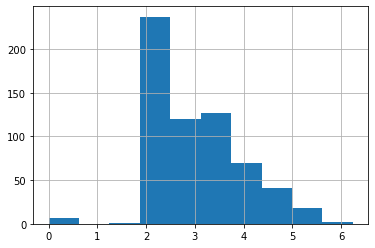

In [30]:
# Logarithmic transformation
data_log =  X_train.copy(deep=True)
data_log['Fare_log'] = np.log(data_log['Fare']+1)
print(data_log.head(10))

data_log['Fare_log'].hist()

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_rec
857         1       1    male  51.0      0   26.5500  0.037665
52          1       1  female  49.0      1   76.7292  0.013033
386         0       3    male   1.0      5   46.9000  0.021322
124         0       1    male  54.0      0   77.2875  0.012939
578         0       3  female   NaN      1   14.4583  0.069164
549         1       2    male   8.0      1   36.7500  0.027211
118         0       1    male  24.0      0  247.5208  0.004040
12          0       3    male  20.0      0    8.0500  0.124224
157         0       3    male  30.0      0    8.0500  0.124224
127         1       3    male  24.0      0    7.1417  0.140023


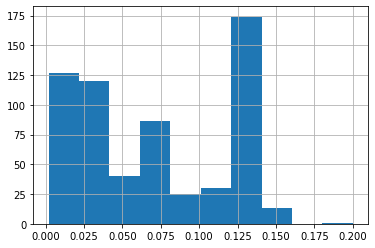

In [31]:
# Reciprocal transformation
data_rec =  X_train.copy(deep=True)
data_rec = data_rec[data_rec.Fare!=0] # Warning that x should not be 0
data_rec['Fare_rec'] = 1/(data_rec['Fare'])
print(data_rec.head(10))

data_rec['Fare_rec'].hist()

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_rec
857         1       1    male  51.0      0   26.5500  0.037665
52          1       1  female  49.0      1   76.7292  0.013033
386         0       3    male   1.0      5   46.9000  0.021322
124         0       1    male  54.0      0   77.2875  0.012939
578         0       3  female   NaN      1   14.4583  0.069164
549         1       2    male   8.0      1   36.7500  0.027211
118         0       1    male  24.0      0  247.5208  0.004040
12          0       3    male  20.0      0    8.0500  0.124224
157         0       3    male  30.0      0    8.0500  0.124224
127         1       3    male  24.0      0    7.1417  0.140023


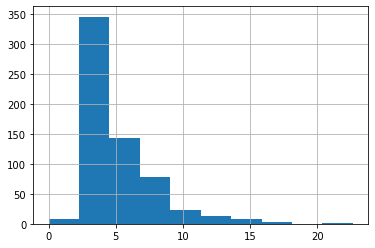

In [34]:
# Square root transformation
data_square =  X_train.copy(deep=True)
data_square['Fare_square'] = (data_square['Fare'])**(0.5)
print(data_rec.head(10))

data_square['Fare_square'].hist()

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_exp
857         1       1    male  51.0      0   26.5500  1.926695
52          1       1  female  49.0      1   76.7292  2.382276
386         0       3    male   1.0      5   46.9000  2.158910
124         0       1    male  54.0      0   77.2875  2.385733
578         0       3  female   NaN      1   14.4583  1.706174
549         1       2    male   8.0      1   36.7500  2.056134
118         0       1    male  24.0      0  247.5208  3.011080
12          0       3    male  20.0      0    8.0500  1.517606
157         0       3    male  30.0      0    8.0500  1.517606
127         1       3    male  24.0      0    7.1417  1.481700


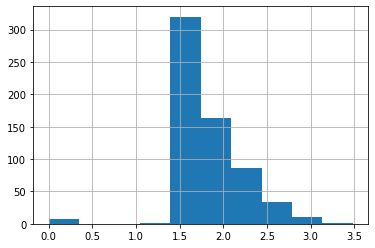

In [36]:
# Exponential transformation
data_exp =  X_train.copy(deep=True)
data_exp['Fare_exp'] = (data_exp['Fare'])** 0.2
print(data_exp.head(10))

data_exp['Fare_exp'].hist()

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_boxcox
857         1       1    male  51.0      0  26.5500     0.398696
52          1       1  female  49.0      1  76.7292     1.401774
386         0       3    male   1.0      5  46.9000     0.950718
124         0       1    male  54.0      0  77.2875     1.408228
578         0       3  female   NaN      1  14.4583    -0.222897
549         1       2    male   8.0      1  36.7500     0.718007


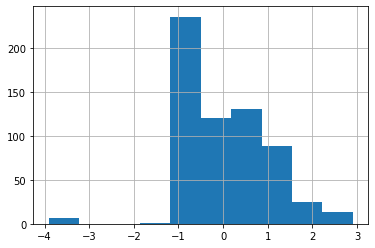

In [40]:
# Box-cox transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer().fit(X_train[['Fare']])
data_box = X_train.copy(deep=True)
data_box['Fare_boxcox'] = pt.transform(data_box[['Fare']])
print(data_box.head(6))
data_box['Fare_boxcox'].hist()

     Survived  Pclass     Sex   Age  SibSp     Fare   Fare_qt
857         1       1    male  51.0      0  26.5500  0.470128
52          1       1  female  49.0      1  76.7292  1.269732
386         0       3    male   1.0      5  46.9000  0.841047
124         0       1    male  54.0      0  77.2875  1.287991
578         0       3  female   NaN      1  14.4583 -0.022167
549         1       2    male   8.0      1  36.7500  0.744471


C:\Users\isaac\Anaconda3\envs\test2\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (623). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


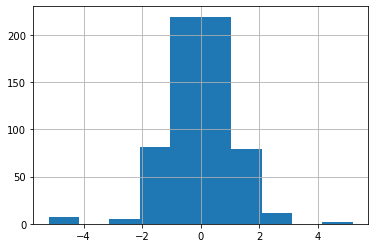

In [39]:
# Quantile transformation
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal').fit(X_train[['Fare']])
data_qu = X_train.copy(deep=True)
data_qu['Fare_qt'] = qt.transform(data_qu[['Fare']])
print(data_qu.head(6))
data_qu['Fare_qt'].hist()

# Feature Selection

In [41]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

print(data.head(5))

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target'], axis=1), 
                                                    data.target, test_size=0.2,
                                                    random_state=0)
print(X_train.shape, X_test.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [43]:
def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the 
    majority/all of the observations (constant/quasi-constant features)
    
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant
        
    Returns
    -------
    list of variables names
    """
    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / np.float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')    
    return quasi_constant_feature

quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.9)

0  variables are found to be almost constant


In [44]:
# lets create a duumy variable that help us do the demonstration
X_train['dummy'] = np.floor(X_train['worst smoothness']*10)
# variable dummy has> 92% of the observations show one value, 1.0
print(X_train.dummy.value_counts() / np.float(len(X_train)))

1.0    0.923077
0.0    0.068132
2.0    0.008791
Name: dummy, dtype: float64


In [46]:
quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.9)
quasi_constant_feature

1  variables are found to be almost constant


['dummy']

In [47]:
# drop that variable
X_train.drop(labels=quasi_constant_feature,axis=1,inplace=True)
print(X_train.shape)

(455, 30)


In [48]:
def corr_feature_detect(data,threshold=0.8):
    """ detect highly-correlated features of a Dataframe
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable correlated
        
    Returns
    -------
    pairs of correlated variables
    """
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups

In [49]:
corr = corr_feature_detect(data=X_train,threshold=0.9)
# print all the correlated feature groups!
for i in corr:
    print(i,'\n')

          feature1         feature2      corr
0   mean perimeter      mean radius  0.998185
6   mean perimeter        mean area  0.986692
14  mean perimeter  worst perimeter  0.970507
19  mean perimeter     worst radius  0.969520
33  mean perimeter       worst area  0.941920 

           feature1      feature2      corr
12  perimeter error  radius error  0.978323
30  perimeter error    area error  0.944995 

          feature1             feature2      corr
36  mean concavity  mean concave points  0.914627 

        feature1       feature2      corr
38  mean texture  worst texture  0.908182 

                feature1             feature2      corr
40  worst concave points  mean concave points  0.906312 

